In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train = pd. read_csv ("train.csv ", index_col ="identifier")
test = pd. read_csv ("test.csv ", index_col ="identifier")

In [40]:
train.head()

,size,kitchens,bathrooms,floor,type,year,condition,elevator,subway,district,rooms,recentOwner,longitude,latitude,prediction,highValue
identifier,,,,,,,,,,,,,,,,
82967,83.73,1,2,26,1,2000,4,True,True,7,4,True,0.710487,0.877563,False,True
97139,62.09,1,1,6,4,1988,4,False,False,10,4,False,-0.692725,-0.781213,True,True
75688,50.66,1,1,6,4,1982,3,False,False,10,3,False,-0.201397,-0.928748,True,True
125507,66.68,1,1,28,1,1999,4,True,True,7,2,False,0.771753,0.832382,True,True
149696,198.36,1,2,33,3,2004,1,True,True,7,5,False,0.759289,-0.432717,False,True


In [53]:
train.shape

(100000, 16)

• identifier: A unique identifier for each property.

• size: The size of the property.

• kitchens: The number of kitchens in the property.

• bathrooms: The number of bathrooms in the property.

• floor: The floor the property is on.

• type: The type of the property.

• year: The year in which the building was constructed.

• condition: The condition of the property.

• elevator: Whether the building has an elevator.

• subway: Whether a subway station is close to the building.

• district: The district in which the building lies.

• rooms: The number of rooms in the property.

• recentOwner: Whether the previous owner had the property for more than 5 years.

• longitude: The longitude of the building.

• latitude: The latitude of the building.

• highValue: Whether the property has a high value per square meter.

• prediction: The prediction made by the existing company. When True they took on the contract, when False they chose not to take it

C:\Users\behdad\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


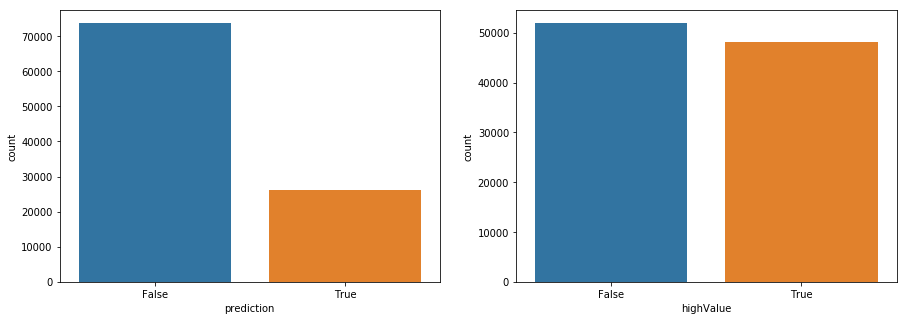

In [42]:
fig,ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(df['prediction'], ax=ax[0])
sns.countplot(df['highValue'], ax=ax[1])
fig.show()

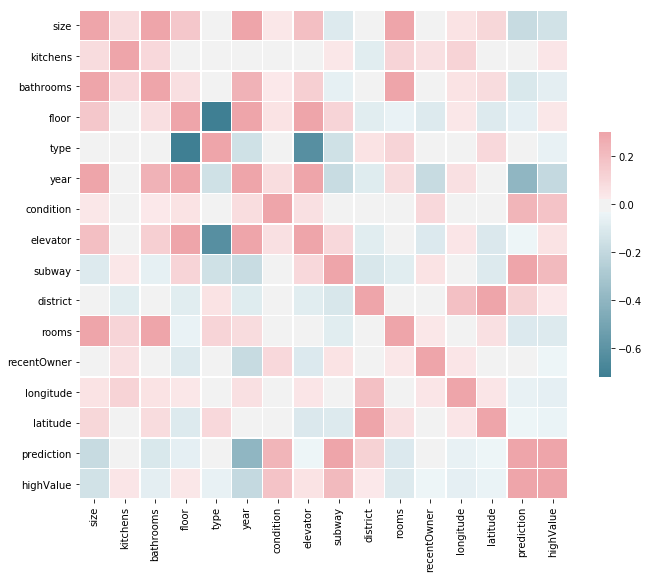

In [46]:
corr = train.corr()

# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

identifier     0.000441
size          -0.145203
kitchens       0.049364
bathrooms     -0.068609
floor          0.037920
type          -0.057361
year          -0.192392
condition      0.179326
elevator       0.058401
subway         0.216272
district       0.035102
rooms         -0.095633
recentOwner   -0.031000
longitude     -0.065736
latitude      -0.039657
prediction     0.391602
highValue      1.000000
Name: highValue, dtype: float64

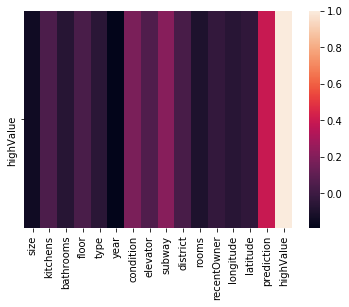

In [51]:
sns.heatmap(train.corr().loc[['highValue'],:])

df.corr().loc['highValue',:]

In [55]:
train.describe(include="all")

,size,kitchens,bathrooms,floor,type,year,condition,elevator,subway,district,rooms,recentOwner,longitude,latitude,prediction,highValue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000,100000.00000,100000,100000.000000,100000.000000,100000,100000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57338,59790,NaN,NaN,61112,NaN,NaN,73765,51957
mean,82.401024,0.991720,1.180580,13.248050,3.038740,1999.353390,3.017580,NaN,NaN,6.683030,3.15598,NaN,-0.000853,0.000781,NaN,NaN
std,36.391275,0.117096,0.424938,7.813978,1.260085,9.028023,1.142867,NaN,NaN,2.838038,1.10565,NaN,1.292985,1.286273,NaN,NaN
min,7.800000,0.000000,0.000000,1.000000,1.000000,1944.000000,1.000000,NaN,NaN,1.000000,1.00000,NaN,-3.908783,-4.363351,NaN,NaN
25%,57.730000,1.000000,1.000000,6.000000,1.000000,1994.000000,3.000000,NaN,NaN,6.000000,2.00000,NaN,-0.813634,-0.767561,NaN,NaN
50%,73.340000,1.000000,1.000000,11.000000,4.000000,2001.000000,3.000000,NaN,NaN,7.000000,3.00000,NaN,0.016923,-0.193001,NaN,NaN
75%,97.490000,1.000000,1.000000,19.000000,4.000000,2006.000000,4.000000,NaN,NaN,8.000000,4.00000,NaN,0.704912,0.732337,NaN,NaN


In [60]:
X = train.drop('highValue', axis=1)
X = X.drop('prediction', axis=1)
X.head()

,size,kitchens,bathrooms,floor,type,year,condition,elevator,subway,district,rooms,recentOwner,longitude,latitude
identifier,,,,,,,,,,,,,,
82967,83.73,1,2,26,1,2000,4,True,True,7,4,True,0.710487,0.877563
97139,62.09,1,1,6,4,1988,4,False,False,10,4,False,-0.692725,-0.781213
75688,50.66,1,1,6,4,1982,3,False,False,10,3,False,-0.201397,-0.928748
125507,66.68,1,1,28,1,1999,4,True,True,7,2,False,0.771753,0.832382
149696,198.36,1,2,33,3,2004,1,True,True,7,5,False,0.759289,-0.432717


In [61]:
y = train['highValue']
y.head()

identifier
82967     True
97139     True
75688     True
125507    True
149696    True
Name: highValue, dtype: bool

In [62]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred = svclassifier.predict(test)

In [64]:
y_pred 

array([ True, False, False, ..., False,  True,  True])